In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [0]:
data = pd.read_csv("amazon_reviews.txt", delimiter = "\t")

In [4]:
data.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [0]:
data.loc[data["LABEL"] == "__label1__", "LABEL"] = '1'
data.loc[data["LABEL"] == "__label2__", "LABEL"] = '0'

In [7]:
len(data)

21000

In [8]:
cnt_srs=data.groupby(data["LABEL"]).PRODUCT_CATEGORY.value_counts()
cnt_srs

LABEL  PRODUCT_CATEGORY      
0      Apparel                   350
       Automotive                350
       Baby                      350
       Beauty                    350
       Books                     350
       Camera                    350
       Electronics               350
       Furniture                 350
       Grocery                   350
       Health & Personal Care    350
       Home                      350
       Home Entertainment        350
       Home Improvement          350
       Jewelry                   350
       Kitchen                   350
       Lawn and Garden           350
       Luggage                   350
       Musical Instruments       350
       Office Products           350
       Outdoors                  350
       PC                        350
       Pet Products              350
       Shoes                     350
       Sports                    350
       Tools                     350
       Toys                      350
       V

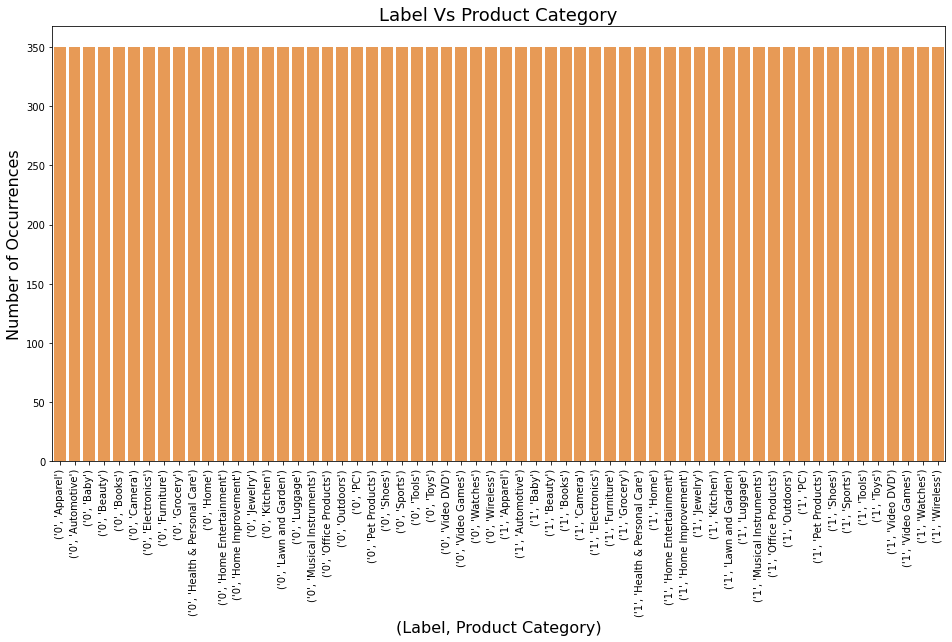

In [9]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Label, Product Category)', fontsize=16)
plt.title('Label Vs Product Category', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

In [10]:
cnt_srs = data.groupby(data["LABEL"]).RATING.value_counts()
cnt_srs

LABEL  RATING
0      5         6151
       4         1974
       3          942
       1          868
       2          565
1      5         6059
       4         1999
       3          926
       1          889
       2          627
Name: RATING, dtype: int64

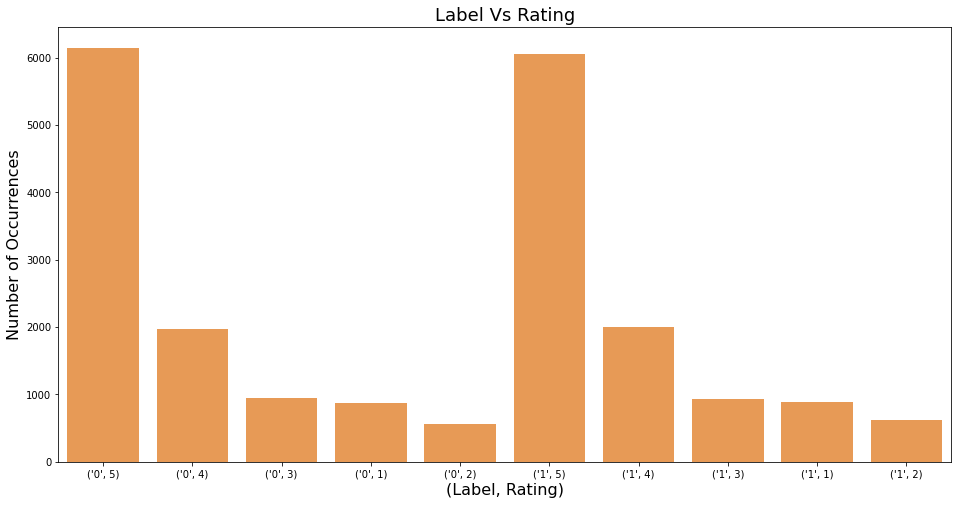

In [11]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Label, Rating)', fontsize=16)
plt.title('Label Vs Rating', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [0]:
cnt_srs = data.groupby(data["RATING"]).PRODUCT_CATEGORY.value_counts()


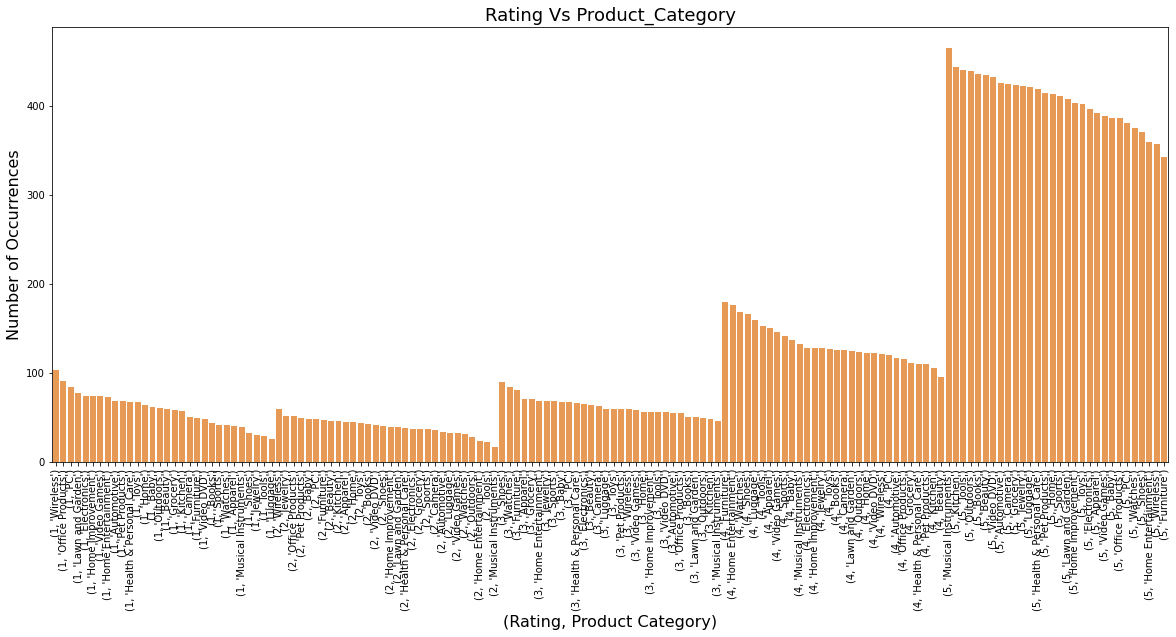

In [14]:
plt.figure(figsize=(20,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Rating, Product Category)', fontsize=16)
plt.title('Rating Vs Product_Category', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

In [15]:
cnt_srs = data.groupby("VERIFIED_PURCHASE").LABEL.value_counts()
cnt_srs

VERIFIED_PURCHASE  LABEL
N                  1        7623
                   0        1679
Y                  0        8821
                   1        2877
Name: LABEL, dtype: int64

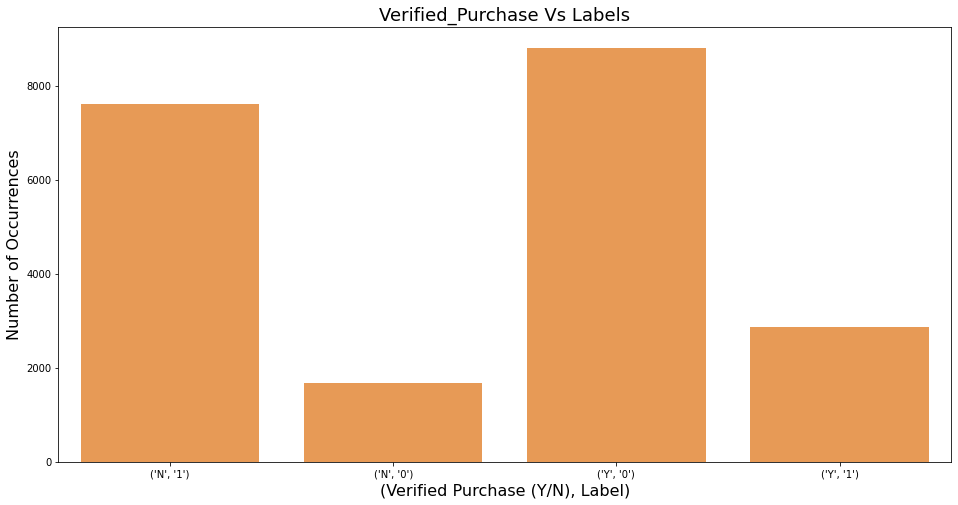

In [16]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Verified Purchase (Y/N), Label)', fontsize=16)
plt.title('Verified_Purchase Vs Labels', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [0]:
df1 = data.groupby("LABEL").REVIEW_TEXT

In [0]:
data['TEXT_LENGTH'] = data['REVIEW_TEXT'].apply(len)

In [19]:
cnt_srs = data.groupby(["LABEL"]).TEXT_LENGTH.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    428.102857
1    316.550000
Name: TEXT_LENGTH, dtype: float64

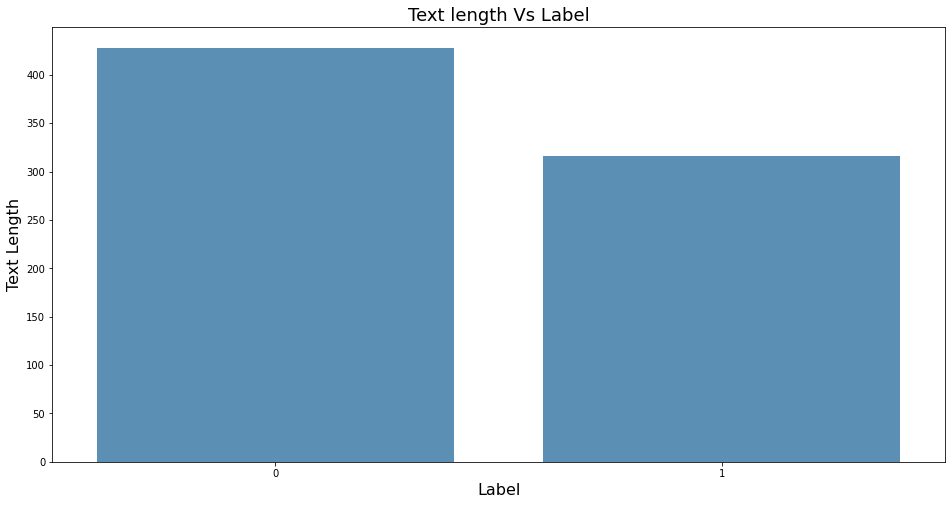

In [20]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Text Length', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Text length Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [0]:
data['num_sentences'] = data['REVIEW_TEXT'].apply(lambda x: len(str(x).split('.')))

In [23]:
data

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,4
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,6
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,5
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,4
...,...,...,...,...,...,...,...,...,...,...,...
20995,20996,0,4,Y,Shoes,B00BXYM8T8,"Madden Girl Women's Gettaw Pump,Red Patent,7.5...",wide width is great!,"I bought these for work. I have high arches, ...",100,4
20996,20997,0,4,Y,Shoes,B0014C2ORK,"crocs Unisex Classic Clog,Khaki,6 US Men's / 8...",Love crocs!,Crocs are one of only two brands of shoes that...,115,1
20997,20998,0,5,Y,Shoes,B000EX8CCQ,Minnetonka Men's 703 Leather Laced Softsole Mo...,I love moccasins This fit like it was custom m...,I love moccasins This fit like it was custom ...,297,4
20998,20999,0,5,Y,Shoes,B00748YHVE,Ariat Womens Unbridled Fatbaby 9 B Powder Brown,"This fit well, comfortable, best investment",I wish these were a little more durable. I got...,287,6


In [24]:
!pip install textstat

     |████████████████████████████████| 3.0MB 7.3MB/s 


In [0]:
import textstat

In [0]:
from textstat.textstat import textstat
data["FK_Score"] = data["REVIEW_TEXT"].apply(textstat.flesch_kincaid_grade)

In [27]:
cnt_srs = data.groupby(["LABEL"]).FK_Score.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    13.803848
1     8.007886
Name: FK_Score, dtype: float64

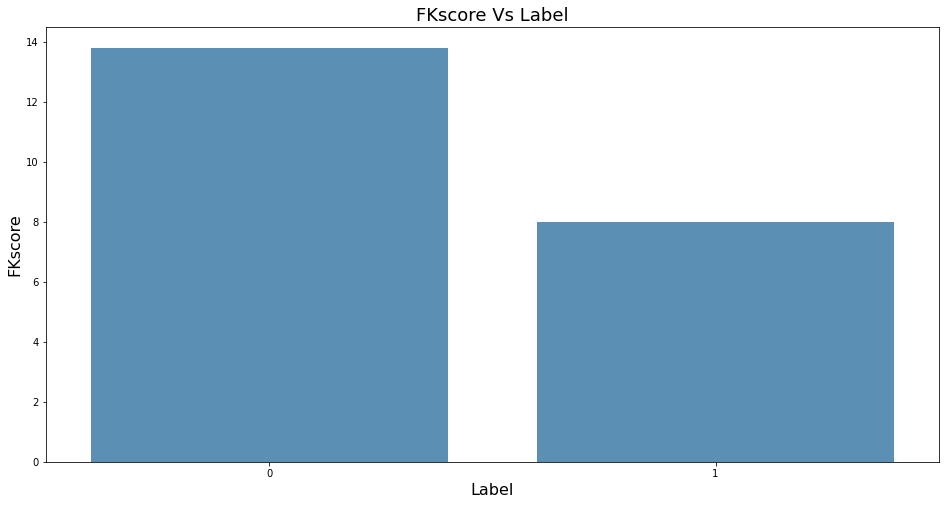

In [28]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('FKscore', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('FKscore Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [30]:
import nltk
nltk.download('stopwords')
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def stopCount(x):
    sum =0
    for char in x.split():
        sum+= char in stop_words
    return sum
data['stop_count'] = data['REVIEW_TEXT'].apply(stopCount)

In [32]:
cnt_srs = data.groupby(["LABEL"]).stop_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    32.519048
1    24.696190
Name: stop_count, dtype: float64

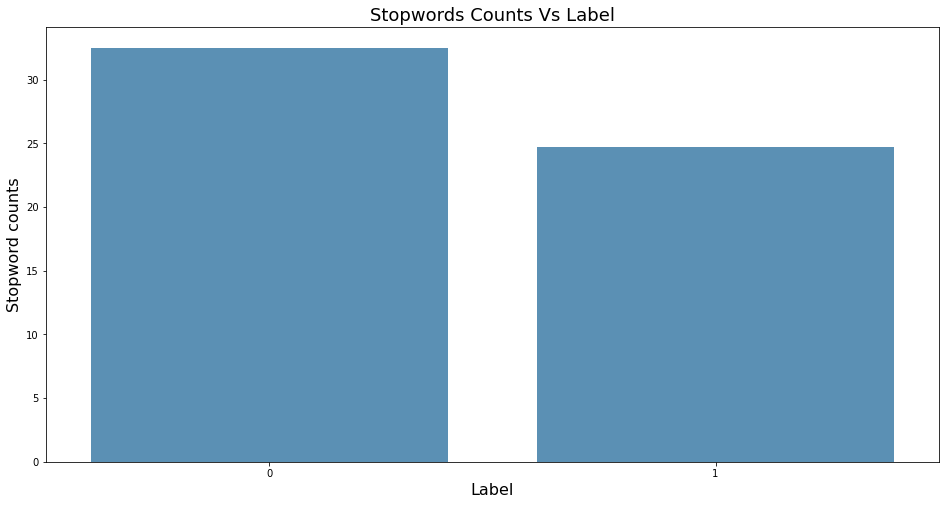

In [33]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Stopword counts', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Stopwords Counts Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [0]:
def capsCount(x):
    sum =0
    for char in x:
        sum+= char in "QWERTYUIOPASDFGHJKLZXCVBNM"
    return sum
data['caps_count'] = data['REVIEW_TEXT'].apply(capsCount)

In [35]:
cnt_srs = data.groupby(["LABEL"]).caps_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    12.099810
1     8.712667
Name: caps_count, dtype: float64

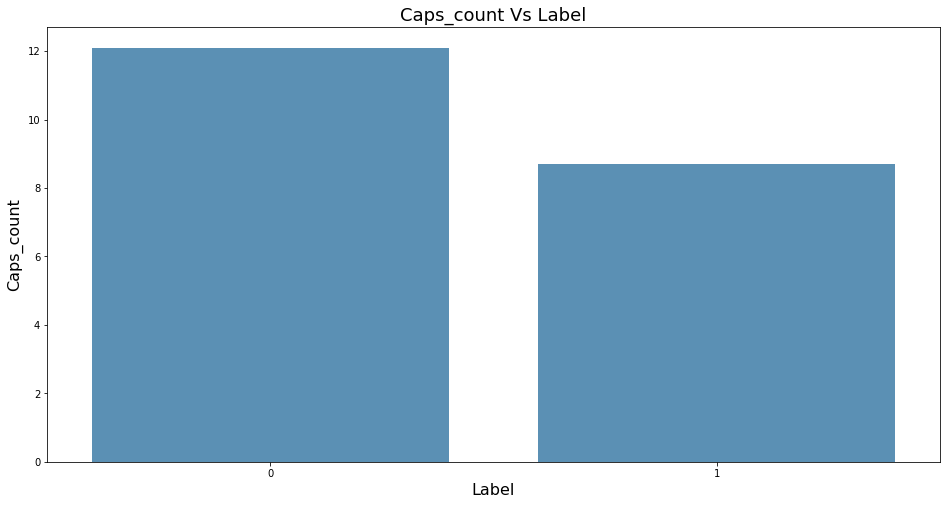

In [36]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Caps_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Caps_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [0]:
import string
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
def punctCount(x):
    return count(x, set(string.punctuation))
data['punct_count'] = data['REVIEW_TEXT'].apply(punctCount)

In [38]:
cnt_srs = data.groupby(["LABEL"]).punct_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    15.571524
1    10.182571
Name: punct_count, dtype: float64

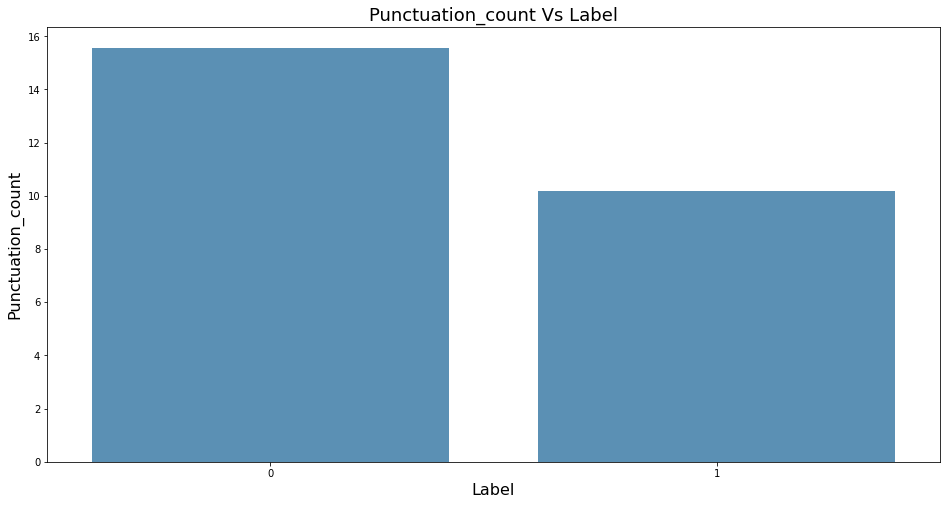

In [39]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Punctuation_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Punctuation_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [0]:
import re
import string
match_list = []

def checkName(title,text):
    matches = []
    for word in title.split():
        #removing punctuation
        word = "".join((char for char in word if char not in string.punctuation))
        #print(word)
        myreg = r'\b'+word+r'\b'
        r = re.compile(myreg, flags=re.I | re.X)
        matches.append(r.findall(text))
    return len(matches)
        

for a,b in zip(data.PRODUCT_TITLE, data.REVIEW_TEXT):
    number_of_matches = checkName(a,b)
    match_list.append(number_of_matches)
    
data["matchesDf"] = match_list

In [41]:
cnt_srs = data.groupby(["LABEL"]).matchesDf.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    10.570667
1    13.823143
Name: matchesDf, dtype: float64

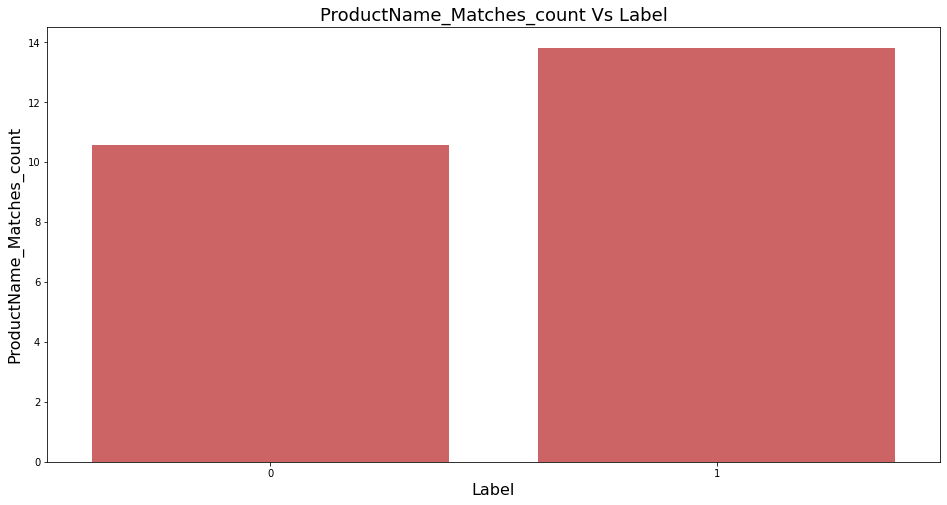

In [42]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.ylabel('ProductName_Matches_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('ProductName_Matches_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [0]:
data["emojis"] = data["REVIEW_TEXT"].apply(lambda x: 1 if ";)" in x.split() or ":)" in x.split() or ":-)" in x.split() else 0)

In [44]:
cnt_srs = data.groupby(["LABEL"]).emojis.agg(lambda x: sum(x))
cnt_srs

LABEL
0    107
1     85
Name: emojis, dtype: int64

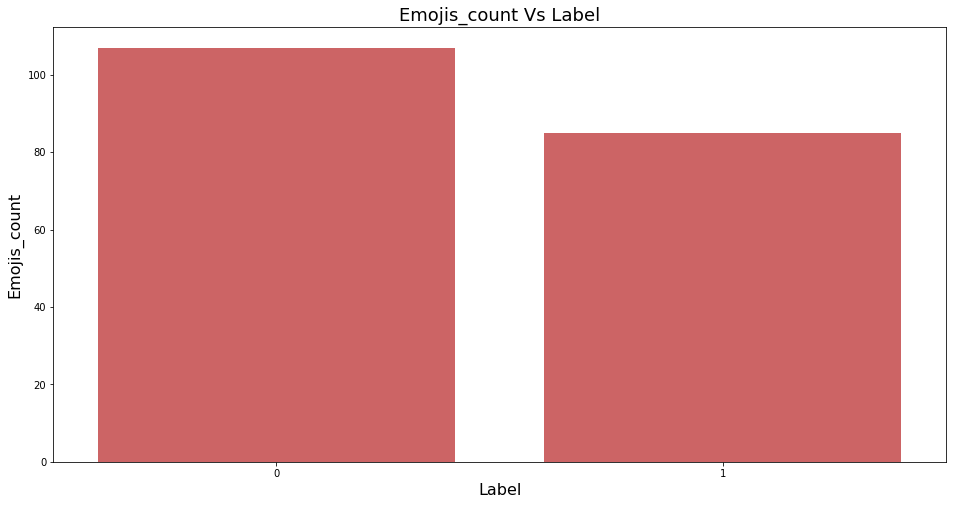

In [45]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.ylabel('Emojis_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Emojis_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [0]:
#SENTIMENT CLASSIFIER
data.loc[data["RATING"] < 3, "RATING"] = 0
data.loc[data["RATING"] > 3, "RATING"] = 1

In [52]:
data.RATING.value_counts()

0    19132
3     1868
Name: RATING, dtype: int64

In [56]:
data1 = data.loc[data['RATING'] == 0]
print(len(data1))
data2 = data1.sample(frac=0.2, replace=True)
print(len(data2))
data3 = data1 = data.loc[data['RATING'] == 3]
print(len(data3))

19132
3826
1868


In [55]:
data4 = pd.concat([data2, data3], ignore_index=True)
data4

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences,FK_Score,stop_count,caps_count,punct_count,matchesDf,emojis
0,4080,1,0,N,Outdoors,B004HC5Y4Y,Intex Quick-Fill Battery Air Pump (6 C-cell Ba...,Why doesn't this work?,"When I got this, I fitted it into my inflatabl...",182,3,5.3,12,5,4,12,0
1,6755,1,0,Y,Lawn and Garden,B000WEKCFM,Seymour SV-LR90 42-Inch Wood Handle Profession...,Great shovel,Great shovel. It gets the job done. The point ...,133,4,4.2,5,3,7,9,0
2,9326,1,0,N,Furniture,B00PTI74T8,Woven Chandler Rug (7'10 X 10'10),This rug looks awesome in my living room and I...,This rug looks awesome in my living room and I...,210,5,3.8,15,6,4,6,0
3,16644,0,0,Y,Musical Instruments,B0051HN59U,Cecilio 4/4 CECO-1WH Pearl White Electric Cell...,Everything about this cello is good -- except ...,"Mine sounded distorted on certain notes, like ...",479,9,6.1,32,8,13,15,0
4,15750,0,0,Y,Baby,B006ZISQE8,"Safety 1st Easy Care Swing Tray Booster Seat, ...",Perfect for us!,We have 2 of these seats and love both. We sta...,191,2,2.6,23,3,2,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,20966,0,3,Y,Shoes,B00IGQRN4G,Womens Superga 2750 Cotu Classic Canvas Low Cu...,cute shoes but just ok,I read the reviews and bought a 51/2 instead o...,347,6,5.1,29,12,8,15,0
5690,20974,0,3,Y,Shoes,B0069087NW,"Columbia Men's Newton Ridge Plus Hiking Boot,C...",Not waterproof,"It is a light, very comfortable boot, very che...",198,4,4.9,18,5,5,9,0
5691,20976,0,3,N,Shoes,B005HO2E2G,"Northside Men's Riverside II Open-Toe Sandal,B...",Looks better in pics than real,Cheaply made ofmilght weight plastics. but for...,186,5,3.9,11,4,5,8,0
5692,20979,0,3,Y,Shoes,B00N7CSCPI,Sayoyo Baby Pink Tassels Soft Sole Leather Inf...,"Good price, guess this is the reason for the ...","Good price, guess this is the reason for the s...",138,5,2.9,14,2,6,14,0


In [57]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from random import shuffle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
rawData = data4[["REVIEW_TEXT", "RATING"]]
rawData = [tuple(x) for x in rawData.values]

In [59]:
rawData

[('When I got this, I fitted it into my inflatable bed and expected it to blow right up but nothing happened! I replaced the batteries and still nothing happened. This is a bad product.',
  0),
 ('Great shovel. It gets the job done. The point works well tearing through the ground - dirt, grass, weeds, that occasional rock or 20.',
  0),
 ('This rug looks awesome in my living room and I am very happy that I purchased it. I was looking for a modern look and this rug fits the bill. I get a lot of compliments about it. Highly recommend purchasing it.',
  0),
 ("Mine sounded distorted on certain notes, like it was being overdriven. I returned it and got a replacement. The second one didn't put out a strong signal, like it was underdriven. It also had distortions. Contacted manufacture and they sent a new pre-amp and pickup, which was easy to install. This made it sound overdriven again. I got the same distortion via headphones and via amp. Other than the inconsistent electronics and unusabl

In [0]:
# TEXT PREPROCESSING AND FEATURE VECTORIZATION
# Input: a string of one review
table = str.maketrans({key: None for key in string.punctuation})
def preProcess(text):
    # Should return a list of tokens
    lemmatizer = WordNetLemmatizer()
    filtered_tokens=[]
    lemmatized_tokens = []
    stop_words = set(stopwords.words('english'))
    text = text.translate(table)
    for w in text.split(" "):
        if w not in stop_words:
            lemmatized_tokens.append(lemmatizer.lemmatize(w.lower()))
        filtered_tokens = [' '.join(l) for l in nltk.bigrams(lemmatized_tokens)] + lemmatized_tokens
    return filtered_tokens

In [0]:
featureDict = {} # A global dictionary of features

def toFeatureVector(tokens):
    localDict = {}
    for token in tokens:
        if token not in featureDict:
            featureDict[token] = 1
        else:
            featureDict[token] = +1
   
        if token not in localDict:
            localDict[token] = 1
        else:
            localDict[token] = +1
    
    return localDict

In [0]:
def crossValidate(dataset, folds):
    shuffle(dataset)
    cv_results = []
    foldSize = int(len(dataset)/folds)
    for i in range(0,len(dataset),foldSize):
        classifier = trainClassifier(dataset[:i]+dataset[foldSize+i:])
        y_pred = predictLabels(dataset[i:i+foldSize],classifier)
        a = accuracy_score(list(map(lambda d : d[1], dataset[i:i+foldSize])), y_pred)
        (p,r,f,_) = precision_recall_fscore_support(list(map(lambda d : d[1], dataset[i:i+foldSize])), y_pred, average ='macro')
        #print(a,p,r,f)
        cv_results.append((a,p,r,f))
    cv_results = (np.mean(np.array(cv_results),axis=0))
    return cv_results

In [0]:
def splitData(percentage):
    dataSamples = len(rawData)
    halfOfData = int(len(rawData)/2)
    trainingSamples = int((percentage*dataSamples)/2)
    for (Text, Label) in rawData[:trainingSamples] + rawData[halfOfData:halfOfData+trainingSamples]:
        trainData.append((toFeatureVector(preProcess(Text)),Label))
    for (Text, Label) in rawData[trainingSamples:halfOfData] + rawData[halfOfData+trainingSamples:]:
        testData.append((toFeatureVector(preProcess(Text)),Label))

In [0]:
def trainClassifier(trainData):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC(C=0.01))])
    return SklearnClassifier(pipeline).train(trainData)

In [0]:
def predictLabels(reviewSamples, classifier):
    return classifier.classify_many(map(lambda t: t[0], reviewSamples))

In [67]:
nltk.download('wordnet')
#rawData = []          # the filtered data from the dataset file (should be 21000 samples)
#preprocessedData = [] # the preprocessed reviews (just to see how your preprocessing is doing)
trainData = []        # the training data as a percentage of the total dataset (currently 80%, or 16800 samples)
testData = []    

#print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
 #     "Preparing the dataset...",sep='\n')

# We split the raw dataset into a set of training data and a set of test data (80/20)
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing training and test data...",sep='\n')
splitData(0.8)
# We print the number of training samples and the number of features
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Training Samples: ", len(trainData), "Features: ", len(featureDict), sep='\n')
print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", crossValidate(trainData, 10))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Now 5694 rawData, 0 trainData, 0 testData
Preparing training and test data...
Now 5694 rawData, 4554 trainData, 1140 testData
Training Samples: 
4554
Features: 
168642
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Mean of cross-validations (Accuracy, Precision, Recall, Fscore):  [0.73951049 0.69328027 0.60235853 0.60160595]


Adding Extra Features

In [0]:
rawData = data4[["REVIEW_TEXT", "VERIFIED_PURCHASE", "PRODUCT_CATEGORY", "LABEL", "RATING"]]
rawData = [tuple(x) for x in rawData.values]

In [0]:
def splitData(percentage):
    dataSamples = len(rawData)
    halfOfData = int(len(rawData)/2)
    trainingSamples = int((percentage*dataSamples)/2)
    for (Text, verified_Purchase, product_Category, Label, Rating) in rawData[:trainingSamples] + rawData[halfOfData:halfOfData+trainingSamples]:
        trainData.append((toFeatureVector(preProcess(Text), verified_Purchase, product_Category, Label), Rating))
    for (Text, verified_Purchase, product_Category, Label, Rating) in rawData[trainingSamples:halfOfData] + rawData[halfOfData+trainingSamples:]:
        testData.append((toFeatureVector(preProcess(Text), verified_Purchase, product_Category, Label), Rating))

In [0]:
featureDict = {} # A global dictionary of features

def toFeatureVector(tokens, verified_Purchase, product_Category, labels):
    localDict = {}
    
#Labels

    featureDict["L"] = 1   
    localDict["L"] = labels

#Verified_Purchase
  
    featureDict["VP"] = 1
            
    if verified_Purchase == "N":
        localDict["VP"] = 0
    else:
        localDict["VP"] = 1

#Product_Category

    
    if product_Category not in featureDict:
        featureDict[product_Category] = 1
    else:
        featureDict[product_Category] = +1
            
    if product_Category not in localDict:
        localDict[product_Category] = 1
    else:
        localDict[product_Category] = +1
            
            
#Text        

    for token in tokens:
        if token not in featureDict:
            featureDict[token] = 1
        else:
            featureDict[token] = +1
            
        if token not in localDict:
            localDict[token] = 1
        else:
            localDict[token] = +1
    
    return localDict

In [72]:
#rawData = []          # the filtered data from the dataset file (should be 21000 samples)
#preprocessedData = [] # the preprocessed reviews (just to see how your preprocessing is doing)
trainData = []        # the training data as a percentage of the total dataset (currently 80%, or 16800 samples)
testData = []    

#print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
 #     "Preparing the dataset...",sep='\n')

# We split the raw dataset into a set of training data and a set of test data (80/20)
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing training and test data...",sep='\n')
splitData(0.8)
# We print the number of training samples and the number of features
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Training Samples: ", len(trainData), "Features: ", len(featureDict), sep='\n')
print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", crossValidate(trainData, 10))

Now 5694 rawData, 0 trainData, 0 testData
Preparing training and test data...
Now 5694 rawData, 4554 trainData, 1140 testData
Training Samples: 
4554
Features: 
168674
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Mean of cross-validations (Accuracy, Precision, Recall, Fscore):  [0.78181818 0.73725241 0.67399293 0.6854258 ]


In [76]:
classifier = trainClassifier(trainData)
predictions = predictLabels(testData, classifier)
true_labels = list(map(lambda d: d[1], testData))
a = accuracy_score(true_labels, predictions)
p, r, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='macro')
print("accuracy: ", a)
print("Precision: ", p)
print("Recall: ", a)
print("f1-score: ", f1)


Training Classifier...
accuracy:  0.5149122807017544
Precision:  0.5507547743010088
Recall:  0.5149122807017544
f1-score:  0.41090996758425624
